In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

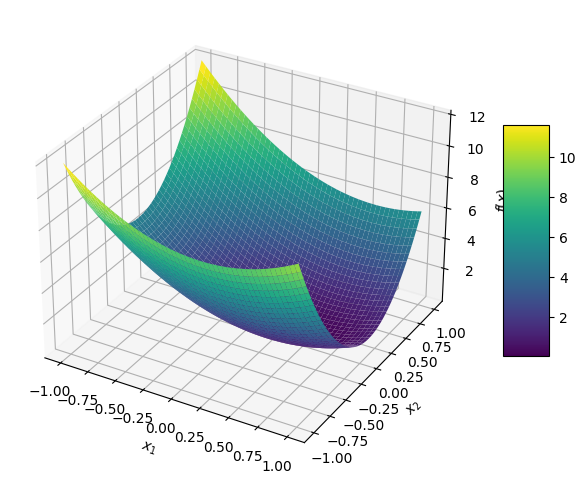

In [2]:
# Define the function f(x) as given in the problem statement
def f(x, A, b):
    return 0.5 * torch.norm(torch.matmul(A, x) - b, p=2)**2

# Create a mesh grid for the specified range
x1 = np.linspace(-1, 1, 400)
x2 = np.linspace(-1, 1, 400)
X1, X2 = np.meshgrid(x1, x2)

# Convert meshgrid to torch tensors
X1_torch = torch.tensor(X1, dtype=torch.float32)
X2_torch = torch.tensor(X2, dtype=torch.float32)

# Define the matrix A and vector b as given in the problem statement
A = torch.tensor([[2, 1], [-1, 3], [0, -2]], dtype=torch.float32)
b = torch.tensor([[1], [0], [0]], dtype=torch.float32)

# Calculate function values on the mesh grid
Z = np.zeros_like(X1)

# Adjust the type conversion for x to ensure it is float32
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = torch.tensor([[X1[i, j]], [X2[i, j]]], dtype=torch.float32)  # Set the tensor type to float32
        Z[i, j] = f(x, A, b).item()

# Plotting the function with the corrected tensor types
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X1, X2, Z, cmap=plt.cm.viridis)

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Set labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')

# Show plot
plt.show()

In [3]:
# Define the point at which we want to compute the gradient
x_grad = torch.tensor([[1], [-1]], dtype=torch.float32, requires_grad=True)

# Compute the function value at x
fx = f(x_grad, A, b)

# Backpropagate to compute the gradient of f with respect to x
fx.backward()

# The gradient is stored in x_grad.grad
gradient_at_x = x_grad.grad
print("The gradient of f at x = [1, -1] is:", gradient_at_x.numpy())

The gradient of f at x = [1, -1] is: [[  4.]
 [-16.]]


In [7]:
# Gradient descent function to find the minimizer of f(x)
def gradient_descent(A, b, initial_x, learning_rate, iterations):
    x = initial_x.clone().detach().requires_grad_(True)
    
    for _ in range(iterations):
        # Calculate the function value at the current point
        fx = f(x, A, b)
        
        # Compute gradients
        fx.backward()
        
        # Update x using the gradients
        with torch.no_grad():
            x -= learning_rate * x.grad
        
        # Zero the gradients for the next iteration
        x.grad.zero_()
    
    return x.detach(), f(x.detach(), A, b).item()

# Initial guess, learning rate, and number of iterations for the gradient descent
initial_x = torch.tensor([[0.0], [0.0]], dtype=torch.float32)
learning_rate = 0.01
iterations = 1000

# Find the minimizer of f(x)
x_star, f_x_star = gradient_descent(A, b, initial_x, learning_rate, iterations)

print("The minimizer x* is:", x_star.numpy())
print("The corresponding f(x*) is:", f_x_star)


The minimizer x* is: [[0.42028955]
 [0.10144923]]
The corresponding f(x*) is: 0.028985504060983658
